# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [145]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | esperance
Processing Record 1 of set 1 | thompson
Processing Record 2 of set 1 | mahebourg
Processing Record 3 of set 1 | san patricio
Processing Record 4 of set 1 | port hardy
Processing Record 5 of set 1 | maniitsoq
Processing Record 6 of set 1 | hofn
Processing Record 7 of set 1 | vaini
Processing Record 8 of set 1 | katsuura
Processing Record 9 of set 1 | hermanus
Processing Record 10 of set 1 | zyryanka
Processing Record 11 of set 1 | ushuaia
Processing Record 12 of set 1 | namibe
Processing Record 13 of set 1 | butaritari
Processing Record 14 of set 1 | salalah
Processing Record 15 of set 1 | guerrero negro
Processing Record 16 of set 1 | albany
Processing Record 17 of set 1 | praia
Processing Record 18 of set 1 | taldan
Processing Record 19 of set 1 | mataura
Processing Record 20 of set 1 | grand river south east
Processing Record 21 of set 1 | barrow
Processing Record 22 of set 1 | faanui
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [157]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url
# target_city = 'phoenix'

# data = requests.get(query_url + target_city).json()
# print(query_url + target_city)

# data['coord']['lon']
# data['coord']['lat']
# data['main']['temp_max']
# data['main']['humidity']
# data['clouds']['all']
# data['wind']['speed']
# data['main']['temp_max']
# data['dt']
# data['sys']['country']
# data['name']
# # 

In [161]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })

df.head()
df.to_csv("cities_t.csv")

Skipped City: grand river south east
Skipped City: belushya guba
Skipped City: taolanaro
Skipped City: hvammstangi
Skipped City: bengkalis
Skipped City: nizhneyansk
Skipped City: sorvag
Skipped City: ngukurr
Skipped City: skalistyy
Skipped City: sentyabrskiy
Skipped City: wulanhaote
Skipped City: kadykchan
Skipped City: attawapiskat
Skipped City: muzquiz
Skipped City: mys shmidta
Skipped City: palabuhanratu
Skipped City: laiagam
Skipped City: buqayq
Skipped City: tuggurt
Skipped City: illoqqortoormiut
Skipped City: malwan
Skipped City: tsihombe
Skipped City: barentsburg
Skipped City: ruatoria
Skipped City: nam tha
Skipped City: fevralsk
Skipped City: amderma
Skipped City: tumannyy
Skipped City: jarjis
Skipped City: samusu
Skipped City: aflu
Skipped City: vaitupu
Skipped City: skiros
Skipped City: tabiauea
Skipped City: sumbawa
Skipped City: bargal
Skipped City: tubruq
Skipped City: macaboboni
Skipped City: yunjinghong
Skipped City: marcona
Skipped City: duz
Skipped City: louisbourg
Ski

In [166]:
# Export the city data into a .csv.
# Display the DataFrame
df.head()
df.to_csv('cities_t.csv', index=False)


In [168]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,21.212795,18.686824,58.938212,69.071181,54.602431,8.020972,1.618631e+09
std,33.246924,89.955392,21.377299,21.694402,39.316109,5.714396,1.148610e+02
min,-54.800000,-175.200000,-11.070000,8.000000,0.000000,0.270000,1.618631e+09
25%,-5.991100,-58.627400,42.800000,59.000000,11.000000,3.870000,1.618631e+09
50%,26.010550,25.910200,62.600000,74.000000,69.000000,6.880000,1.618631e+09
75%,50.423075,96.188875,77.000000,85.000000,91.250000,10.717500,1.618631e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,48.250000,1.618631e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [169]:
# Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,21.212795,18.686824,58.938212,69.071181,54.602431,8.020972,1.618631e+09
std,33.246924,89.955392,21.377299,21.694402,39.316109,5.714396,1.148610e+02
min,-54.800000,-175.200000,-11.070000,8.000000,0.000000,0.270000,1.618631e+09
25%,-5.991100,-58.627400,42.800000,59.000000,11.000000,3.870000,1.618631e+09
50%,26.010550,25.910200,62.600000,74.000000,69.000000,6.880000,1.618631e+09
75%,50.423075,96.188875,77.000000,85.000000,91.250000,10.717500,1.618631e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,48.250000,1.618631e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [171]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,68.00,45,55,5.75,AU,1618630757
1,Thompson,55.7435,-97.8558,37.40,52,40,4.61,CA,1618630758
2,Mahébourg,-20.4081,57.7000,77.00,94,40,8.05,MU,1618630758
3,San Patricio,28.0170,-97.5169,77.00,100,90,23.02,US,1618630758
4,Port Hardy,50.6996,-127.4199,60.80,48,1,5.75,CA,1618630759
...,...,...,...,...,...,...,...,...,...
571,Champerico,14.3000,-91.9167,68.00,97,41,8.57,GT,1618631052
572,Edéia,-17.3383,-49.9314,67.08,84,56,4.76,BR,1618631053
573,Sakakah,29.9697,40.2064,69.80,43,11,3.44,SA,1618630937
574,Faya,18.3851,42.4509,60.80,27,0,7.09,SA,1618631053


In [242]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# clean_city_data
clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
0,Esperance,-33.8667,121.9000,68.00,45,55,5.75,AU,2021-04-17 03:39:17,2021-04-17,03:39:17
1,Thompson,55.7435,-97.8558,37.40,52,40,4.61,CA,2021-04-17 03:39:18,2021-04-17,03:39:18
2,Mahébourg,-20.4081,57.7000,77.00,94,40,8.05,MU,2021-04-17 03:39:18,2021-04-17,03:39:18
3,San Patricio,28.0170,-97.5169,77.00,100,90,23.02,US,2021-04-17 03:39:18,2021-04-17,03:39:18
4,Port Hardy,50.6996,-127.4199,60.80,48,1,5.75,CA,2021-04-17 03:39:19,2021-04-17,03:39:19
...,...,...,...,...,...,...,...,...,...,...,...
571,Champerico,14.3000,-91.9167,68.00,97,41,8.57,GT,2021-04-17 03:44:12,2021-04-17,03:44:12
572,Edéia,-17.3383,-49.9314,67.08,84,56,4.76,BR,2021-04-17 03:44:13,2021-04-17,03:44:13
573,Sakakah,29.9697,40.2064,69.80,43,11,3.44,SA,2021-04-17 03:42:17,2021-04-17,03:42:17
574,Faya,18.3851,42.4509,60.80,27,0,7.09,SA,2021-04-17 03:44:13,2021-04-17,03:44:13


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

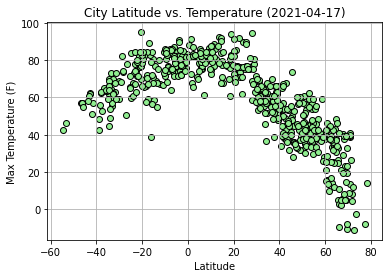

In [287]:
dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

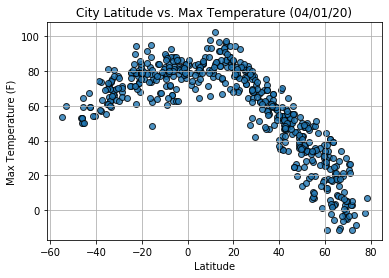

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

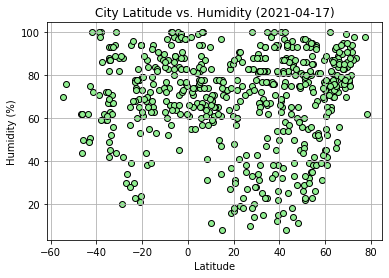

In [288]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

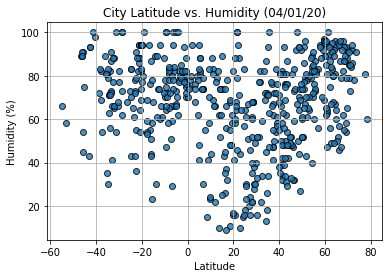

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

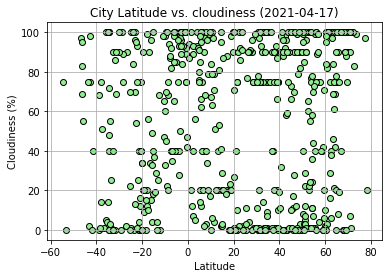

In [289]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

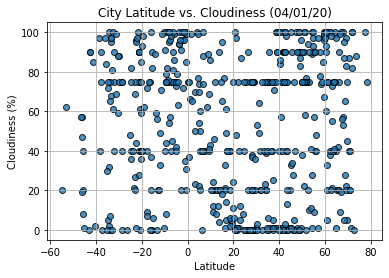

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

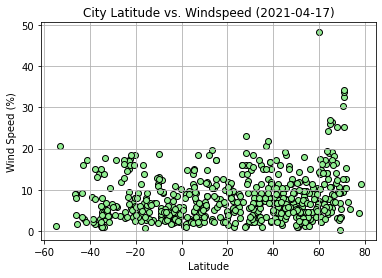

In [290]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

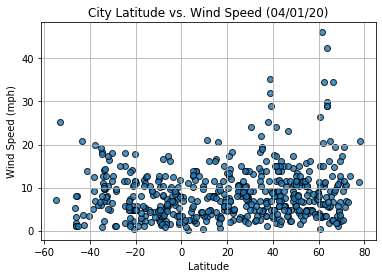

## Linear Regression

In [291]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
0,Esperance,-33.8667,121.9000,68.00,45,55,5.75,AU,2021-04-17 03:39:17,2021-04-17,03:39:17
2,Mahébourg,-20.4081,57.7000,77.00,94,40,8.05,MU,2021-04-17 03:39:18,2021-04-17,03:39:18
7,Vaini,-21.2000,-175.2000,78.80,69,40,6.91,TO,2021-04-17 03:39:20,2021-04-17,03:39:20
9,Hermanus,-34.4187,19.2345,65.07,49,0,5.39,ZA,2021-04-17 03:39:20,2021-04-17,03:39:20
11,Ushuaia,-54.8000,-68.3000,42.80,70,75,1.14,AR,2021-04-17 03:37:41,2021-04-17,03:37:41
...,...,...,...,...,...,...,...,...,...,...,...
560,Isangel,-19.5500,169.2667,84.20,79,90,8.05,VU,2021-04-17 03:44:08,2021-04-17,03:44:08
562,Ambovombe,-25.1667,46.0833,65.32,65,22,16.33,MG,2021-04-17 03:44:09,2021-04-17,03:44:09
563,Mount Isa,-20.7333,139.5000,84.20,21,16,16.11,AU,2021-04-17 03:44:09,2021-04-17,03:44:09
566,Iquique,-20.2208,-70.1431,66.20,63,0,2.44,CL,2021-04-17 03:44:10,2021-04-17,03:44:10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8821
The r-squared is: 0.7780624215739179


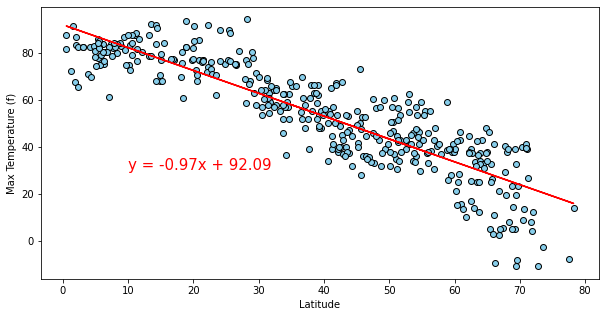

In [292]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.46937863826630627


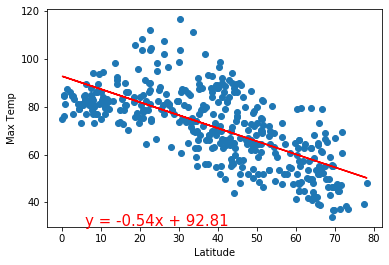

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.6832
The r-squared is: 0.46673117716476464


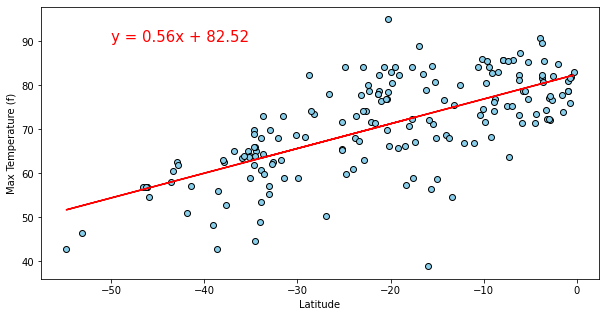

In [284]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.6082708688906918


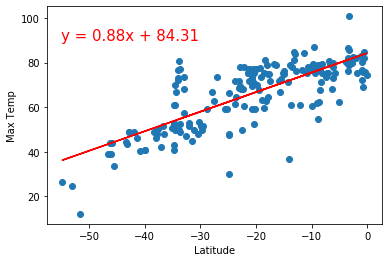

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.1324
The r-squared is: 0.01753650089330323


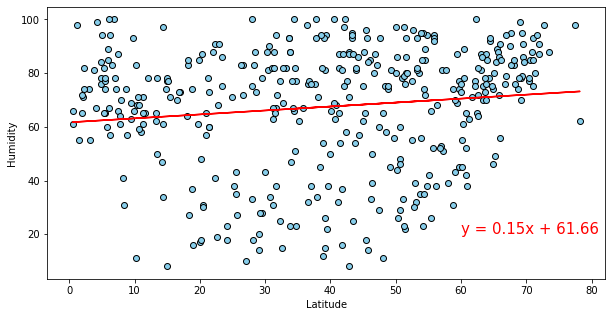

In [310]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.000543987878808455


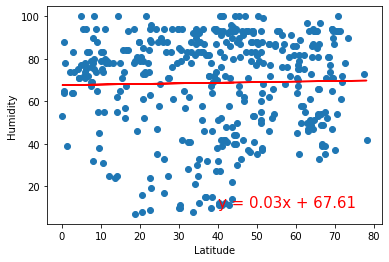

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.2477
The r-squared is: 0.06133693135814133


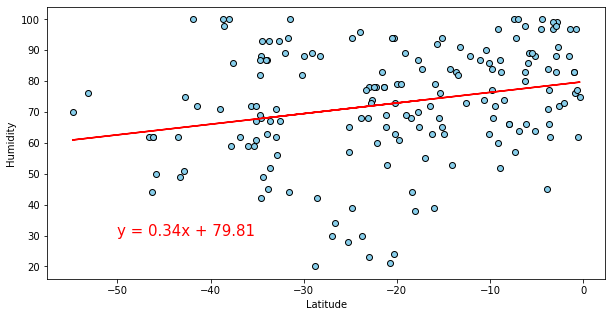

In [304]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.014985174297345524


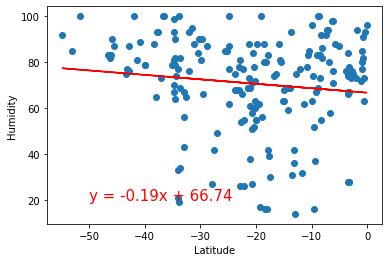

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is 0.1026
The r-squared is: 0.010522579837957204


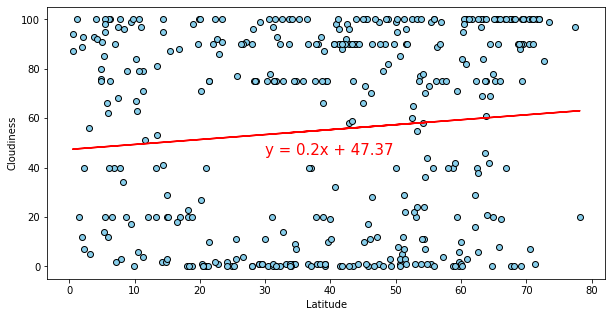

In [303]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0020898727664228514


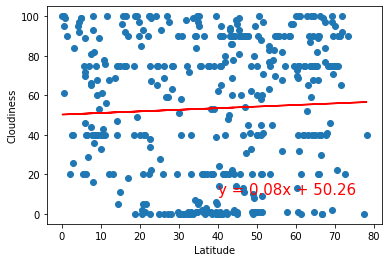

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.2743
The r-squared is: 0.07523258999303556


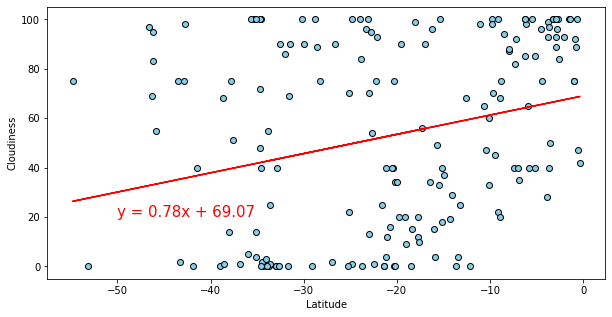

In [306]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0035263772085582894


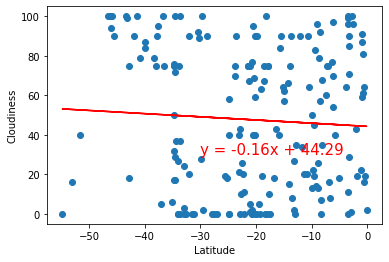

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.2066
The r-squared is: 0.04266546071158614


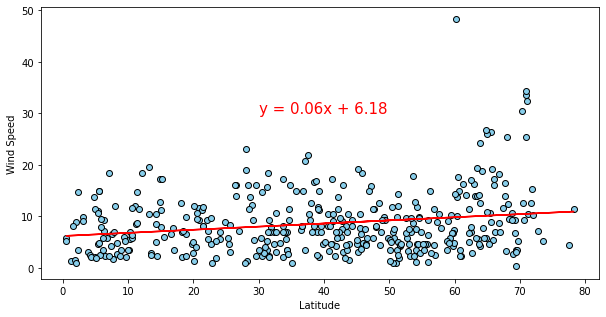

In [308]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.04019723576144484


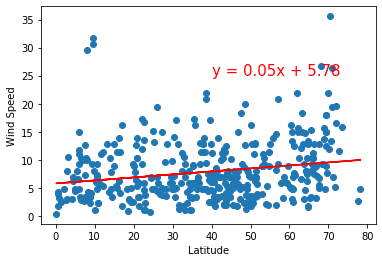

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.1391
The r-squared is: 0.01933618579295486


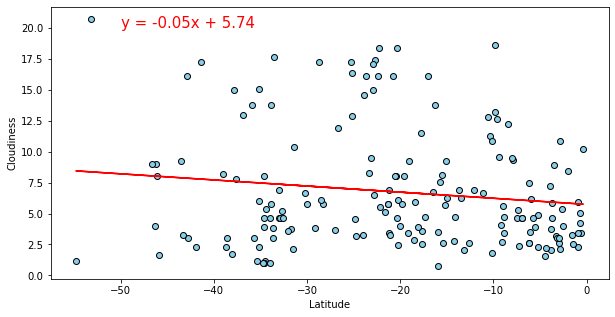

In [309]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.017128274759839232


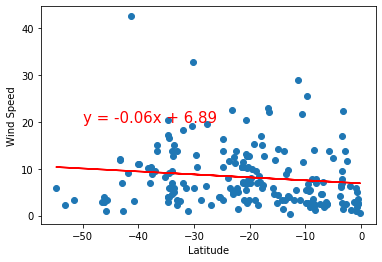